<a href="https://colab.research.google.com/github/Radhe-0/Practicas/blob/main/Machine%20Learning/Red_neuronal_5(clasificacion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal de clasificación usando SKLearn

In [ ]:
!git clone https://github.com/Radhe-0/Generadores.git

Cloning into 'Generadores'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 139 (delta 76), reused 38 (delta 18), pack-reused 0
Receiving objects: 100% (139/139), 459.51 KiB | 1.91 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [1]:
%cd Generadores

/content/Generadores


In [2]:
# Importamos las librerías

from Generadores import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [3]:
# Carga de los datos

datos = DatosSVM2(100000,cumulo=1)
df = pd.DataFrame(datos, columns=['X','Y'])

datos2 = DatosSVM2(100000,cumulo=4)
df2 = pd.DataFrame(datos2, columns=['X','Y'])

df['categoria'] = 0
df2['categoria'] = 1

data = pd.concat([df, df2], axis='rows')

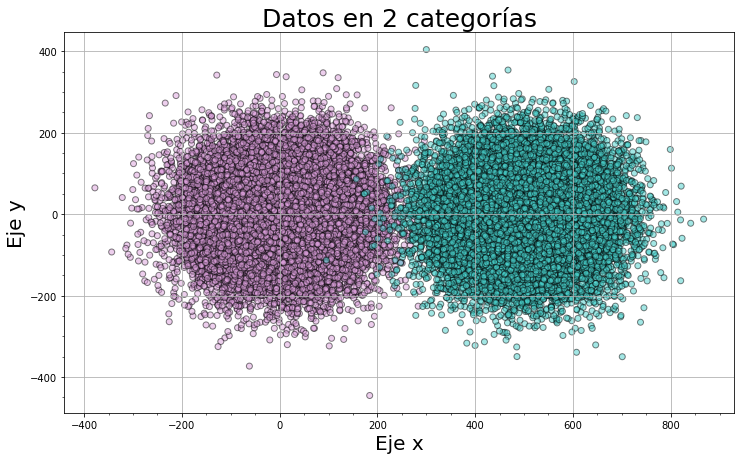

In [4]:
# Visualizamos los datos

colores = {
    0: 'plum',
    1: 'mediumturquoise'
}

fig = plt.figure(figsize=(12,7))
ax = plt.subplot()
ax.scatter(data['X'], data['Y'],edgecolors='black',c=data['categoria'].map(colores),alpha=0.5)
plt.title('Datos en 2 categorías', fontsize=25)
plt.xlabel('Eje x', fontsize=20)
plt.ylabel('Eje y', fontsize=20)
plt.minorticks_on()
plt.grid()
plt.show()

In [5]:
# Separo los datos en 2 grupos: Datos de entrenamiento y datos de validación

X = data[['X','Y']]
Y = data['categoria']

xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [6]:
# Normalizo los datos

scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [15]:
# Creamos el modelo de red neuronal

model = MLPClassifier(
    hidden_layer_sizes=(2,), # Una capa oculta con dos neuronas
    verbose=True
)

# Entrenamos el modelo

model.fit(xtrain,ytrain)

Iteration 1, loss = 0.53838662
Iteration 2, loss = 0.08516315
Iteration 3, loss = 0.01529247
Iteration 4, loss = 0.00770412
Iteration 5, loss = 0.00510950
Iteration 6, loss = 0.00383218
Iteration 7, loss = 0.00310726
Iteration 8, loss = 0.00266509
Iteration 9, loss = 0.00238268
Iteration 10, loss = 0.00219715
Iteration 11, loss = 0.00207744
Iteration 12, loss = 0.00201003
Iteration 13, loss = 0.00195709
Iteration 14, loss = 0.00193964
Iteration 15, loss = 0.00191844
Iteration 16, loss = 0.00190735
Iteration 17, loss = 0.00190523
Iteration 18, loss = 0.00190054
Iteration 19, loss = 0.00189743
Iteration 20, loss = 0.00189978
Iteration 21, loss = 0.00189878
Iteration 22, loss = 0.00189833
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(2,), verbose=True)

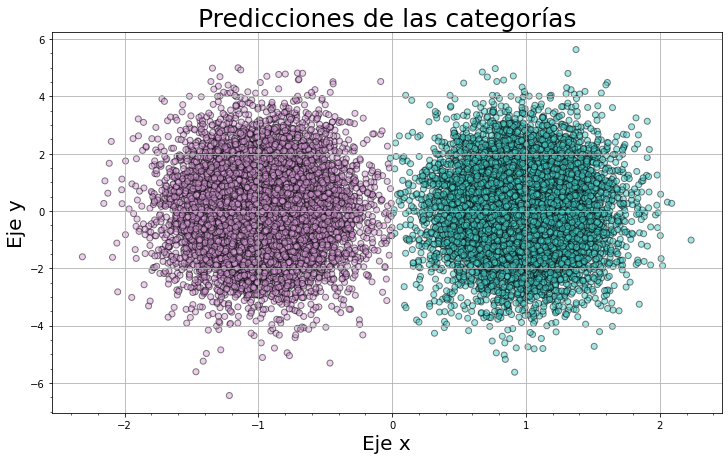

In [19]:
# Realizo predicciones con los datos de validacion

predicciones = model.predict(xtest)

# Grafico las predicciones

xtestdf = pd.DataFrame(xtest, columns=['X','Y'])
xtestdf['categoria'] = predicciones

fig = plt.figure(figsize=(12,7))
plt.scatter(xtestdf['X'], xtestdf['Y'],c=xtestdf['categoria'].map(colores), edgecolors='black',alpha=0.5)
plt.title('Predicciones de las categorías', fontsize=25)
plt.xlabel('Eje x', fontsize=20)
plt.ylabel('Eje y', fontsize=20)
plt.minorticks_on()
plt.grid()
plt.show()

In [20]:
# Precisión del modelo

model.score(xtest,ytest)

0.99932

**La precisión es del 99%**

In [18]:
# Pesos de las capas

model.coefs_

[array([[ 2.07018468, -3.37373914],
        [-0.03265397, -0.10814757]]), array([[ 3.27890862],
        [-2.99860321]])]